<a href="https://colab.research.google.com/github/abdelrahmanfekri/Machine-Learning/blob/main/HandWritenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
pip install gradio

##Import the libraries

In [128]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout,Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten
import numpy as np

#Load and Split data

In [129]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Exploring Data

In [130]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [131]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

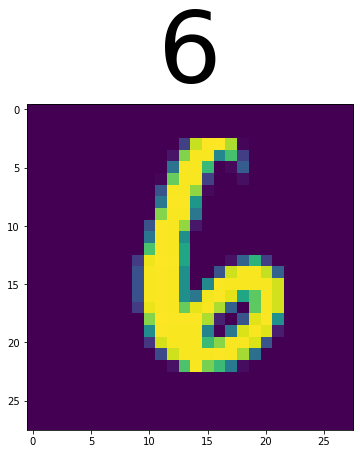

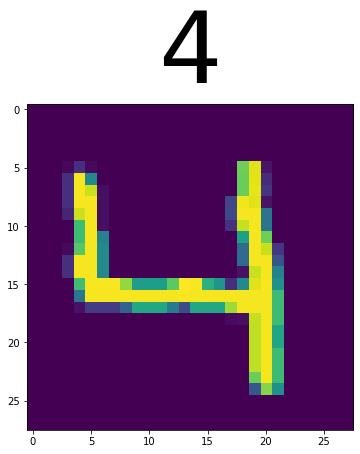

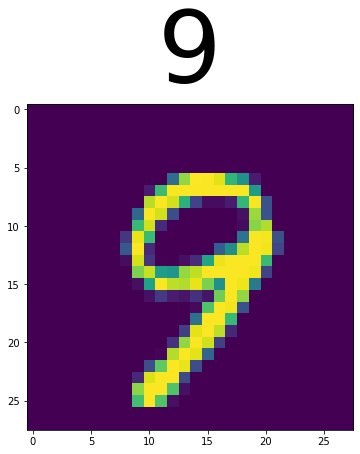

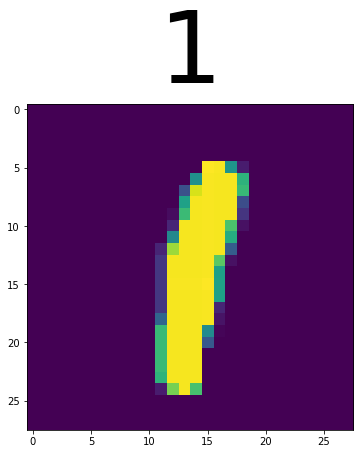

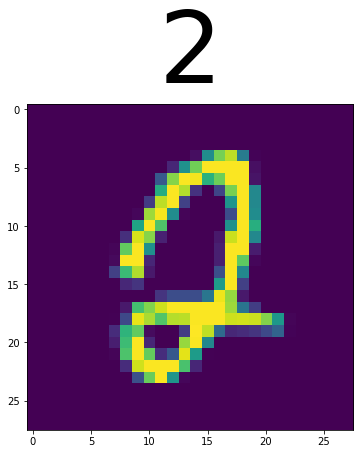

In [132]:
ind = np.random.randint(X_train.shape[0],size = (5))
for i in ind:
  plt.figure(figsize = (10,6))
  plt.imshow(X_train[i])
  plt.title(y_train[i],fontdict = {'fontsize' : 100})

#Scale the data

In [133]:
X_train_scale = X_train/X_train.max()
X_test_scale = X_test/X_test.max()
numclass = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train,numclass)
y_test_cat = tf.keras.utils.to_categorical(y_test,numclass)

X_train_scale = np.expand_dims(X_train_scale,axis = 3)
X_test_scale = np.expand_dims(X_test_scale,axis = 3)
X_train_scale.shape

(60000, 28, 28, 1)

#make model

In [134]:
model = Sequential([
    Conv2D(filters = 32,kernel_size = (5),padding = 'same',activation = 'relu',input_shape = X_train_scale.shape[1:]),
    Dropout(0.3),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 64,kernel_size = (3),padding = 'same',activation = 'relu'),
    Dropout(0.3),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 128,kernel_size = (2),padding = 'same',activation = 'relu'),
    Dropout(0.3),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 128,activation = 'relu'),
    Dense(10,activation ='sigmoid')]
)

opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics =['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

#Define Early Stop

In [135]:
early_stop = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 15,
    restore_best_weights = True
)

In [136]:
model.fit(X_train_scale,y_train_cat,batch_size =30,epochs =10,validation_data=(X_test_scale,y_test_cat),callbacks =[early_stop])

Epoch 1/10
2000/2000 [==============================] - 25s 12ms/step - loss: 0.0494 - binary_accuracy: 0.9835 - val_loss: 0.0209 - val_binary_accuracy: 0.9936
Epoch 2/10
2000/2000 [==============================] - 17s 9ms/step - loss: 0.0335 - binary_accuracy: 0.9897 - val_loss: 0.0209 - val_binary_accuracy: 0.9937
Epoch 3/10
2000/2000 [==============================] - 17s 9ms/step - loss: 0.0334 - binary_accuracy: 0.9902 - val_loss: 0.0169 - val_binary_accuracy: 0.9946
Epoch 4/10
2000/2000 [==============================] - 17s 8ms/step - loss: 0.0326 - binary_accuracy: 0.9910 - val_loss: 0.0191 - val_binary_accuracy: 0.9946
Epoch 5/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.0341 - binary_accuracy: 0.9911 - val_loss: 0.0193 - val_binary_accuracy: 0.9943
Epoch 6/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.0336 - binary_accuracy: 0.9913 - val_loss: 0.0166 - val_binary_accuracy: 0.9952
Epoch 7/10
2000/2000 [=======================

# Evaluate the model

In [137]:
print("evaluation of the model in test data",model.evaluate(X_test_scale,y_test_cat,batch_size = 30))

334/334 [==============================] - 2s 4ms/step - loss: 0.0201 - binary_accuracy: 0.9938
evaluation of the model in test data [0.02009246125817299, 0.9937599897384644]


# random dataset from test data

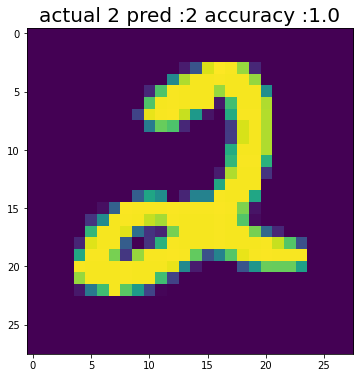

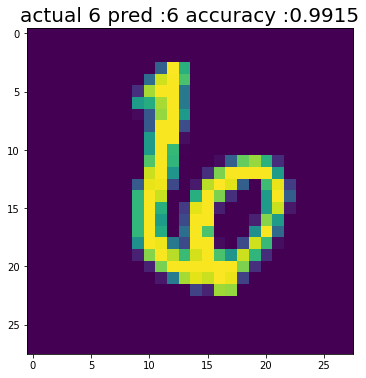

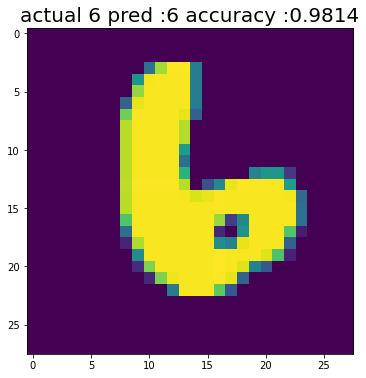

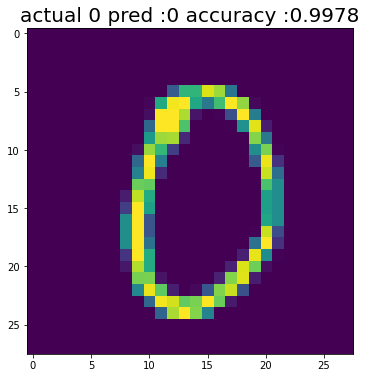

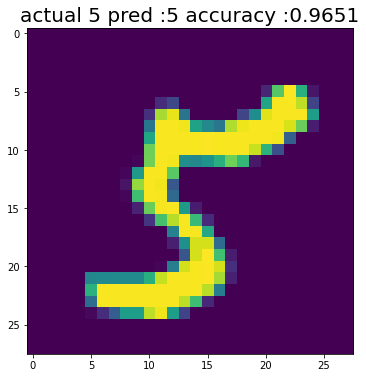

In [138]:
indx = np.random.randint(X_test_scale.shape[0],size =(5))
for i in indx:
  plt.figure(figsize = (10,6))
  plt.imshow(X_test[i])
  pred = model.predict(np.expand_dims(X_test_scale[i],axis = 0))
  title = 'actual '+str(y_test[i]) + ' pred :'+str(np.argmax(pred))+" accuracy :"+str(np.round(pred.max(),decimals = 4))
  plt.title(title,fontdict={'fontsize':20})

#Build Gui With Gradio library

In [139]:
import gradio as gr
check = 0
def func(img):
  img = img.reshape((1,28,28,1))
  img = img/255.0
  pred = model.predict(img)[0]
  pred = (np.round(pred,decimals =4)).tolist()
  return {str(i):pred[i] for i in range(0,10)}


In [ ]:

iface = gr.Interface(
    fn = func, 
    inputs = 'sketchpad', 
    outputs = 'label',
)
iface.launch(debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://50078.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


In [141]:
range(0,10)

range(0, 10)